In [19]:
# import dependencies
#data processing
import pandas as pd
import random as rand
import numpy as np
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler

 




data = pd.read_csv('./fauxStudentGen.csv')
data.head()

,Student Id,Student Name,Gender,Birthday,Zip Code,Assignment Type,Subject Category,Available Points,Points Recieved,Homework Assigned,Homework Submitted,Homework Duration
0,9.0,Corey Castaneda,Male,2002-08-18,32201.0,Virtual,History and Tradition,50.0,23.0,2023-10-28,2023-10-29,1.0
1,44.0,Leah Pham,Female,2005-11-11,32201.0,Virtual,History and Tradition,50.0,5.0,2023-10-24,2023-10-29,5.0
2,36.0,Catherine Gomez,Female,2005-01-08,32204.0,Virtual,Academics,10.0,3.0,2023-10-21,2023-10-23,2.0
3,80.0,George Anderson,Male,2002-11-14,32205.0,In-Person,Health & Wellness,40.0,4.0,2023-10-28,2023-10-28,0.0
4,60.0,Elijah Wood,Male,2005-07-13,32205.0,Virtual,Business & Finance,30.0,12.0,2023-10-25,2023-10-26,1.0


In [20]:
data = data.dropna()
data.head()

,Student Id,Student Name,Gender,Birthday,Zip Code,Assignment Type,Subject Category,Available Points,Points Recieved,Homework Assigned,Homework Submitted,Homework Duration
0,9.0,Corey Castaneda,Male,2002-08-18,32201.0,Virtual,History and Tradition,50.0,23.0,2023-10-28,2023-10-29,1.0
1,44.0,Leah Pham,Female,2005-11-11,32201.0,Virtual,History and Tradition,50.0,5.0,2023-10-24,2023-10-29,5.0
2,36.0,Catherine Gomez,Female,2005-01-08,32204.0,Virtual,Academics,10.0,3.0,2023-10-21,2023-10-23,2.0
3,80.0,George Anderson,Male,2002-11-14,32205.0,In-Person,Health & Wellness,40.0,4.0,2023-10-28,2023-10-28,0.0
4,60.0,Elijah Wood,Male,2005-07-13,32205.0,Virtual,Business & Finance,30.0,12.0,2023-10-25,2023-10-26,1.0


In [21]:
#Get descriptive statistics on data
%matplotlib inline
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

/var/folders/4_/tl5y45h97j72d_pr9f2ddq6r0000gn/T/ipykernel_13667/3449598558.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot:>

Error in callback <function flush_figures at 0x125f749d0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# map gender to 0 or 1 
# Male = 0
# Female = 1

mappings = {
    'Male': 0,
    'Female': 1,

}
data['Gender'] = data['Gender'].map(mappings)


#print data to show new changes
data.head()

,Student Id,Student Name,Gender,Birthday,Zip Code,Assignment Type,Subject Category,Available Points,Points Recieved,Homework Assigned,Homework Submitted,Homework Duration
0,9.0,Corey Castaneda,0,2002-08-18,32201.0,Virtual,History and Tradition,50.0,23.0,2023-10-28,2023-10-29,1.0
1,44.0,Leah Pham,1,2005-11-11,32201.0,Virtual,History and Tradition,50.0,5.0,2023-10-24,2023-10-29,5.0
2,36.0,Catherine Gomez,1,2005-01-08,32204.0,Virtual,Academics,10.0,3.0,2023-10-21,2023-10-23,2.0
3,80.0,George Anderson,0,2002-11-14,32205.0,In-Person,Health & Wellness,40.0,4.0,2023-10-28,2023-10-28,0.0
4,60.0,Elijah Wood,0,2005-07-13,32205.0,Virtual,Business & Finance,30.0,12.0,2023-10-25,2023-10-26,1.0


In [ ]:
## break data into two arrays, (x,y) to train function
X = data.drop(['Homework Duration', 'Student Name','Birthday', 'Assignment Type', 'Subject Category', 'Homework Assigned', 'Homework Submitted'],axis=1)
y = data['Homework Duration'] 


##use test train split model to split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [ ]:
#Scaler for model fit
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
#Fitting decision tree classifier from train model
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#predicting test set results
y_pred = classifier.predict(X_test)
y_pred

array([0., 1., 4., 0., 0., 3., 0., 0.])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scikitplot/metrics.py:124: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


<AxesSubplot:title={'center':'Confusion Matrix for Student Prediction Model'}, xlabel='Predicted label', ylabel='True label'>

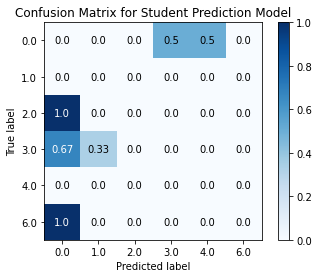

In [ ]:
#Create confusion matrix
cm = skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title = 'Confusion Matrix for Student Prediction Model')
cm